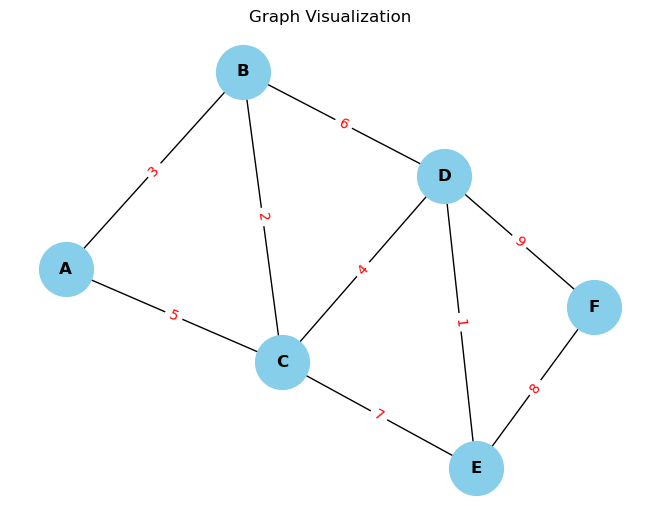

In [67]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty undirected graph
G = nx.Graph()

# Define the vertices
vertices = ['A', 'B', 'C', 'D', 'E', 'F']

# Add the vertices to the graph
G.add_nodes_from(vertices)

# Define the edges with positive weights
edges = [('A', 'B', 3), ('A', 'C', 5), ('B', 'C', 2),
         ('B', 'D', 6), ('C', 'D', 4), ('C', 'E', 7),
         ('D', 'E', 1), ('E', 'F', 8), ('D', 'F', 9)]

# Add the edges to the graph with weights
for edge in edges:
    source, target, weight = edge
    G.add_edge(source, target, weight=weight)
    
# Determine positions using spring layout
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=12, font_weight="bold")

# Draw edge labels
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Show the graph
plt.title('Graph Visualization')
plt.show()


In [68]:
import numpy as np

def dijkstra_adjacency_matrix(graph, start):
    # Number of vertices in the graph
    num_vertices = len(graph)
    
    # Initialize distances array with infinity for all vertices
    distances = [float('inf')] * num_vertices
    # Distance to the start vertex is 0
    distances[start] = 0
    
    # Priority queue implemented as an array
    priority_queue = list(range(num_vertices))
    
    # Main loop
    while priority_queue:
        # Find vertex with minimum distance from the priority queue
        min_distance_vertex = min(priority_queue, key=lambda vertex: distances[vertex])
        priority_queue.remove(min_distance_vertex)
        
        # Update distances for adjacent vertices
        for v in range(num_vertices):
            if graph[min_distance_vertex][v] > 0:
                new_distance = distances[min_distance_vertex] + graph[min_distance_vertex][v]
                if new_distance < distances[v]:
                    distances[v] = new_distance
    
    return distances

# graph represented as an adjacency matrix
graph_adjacency_matrix = np.zeros((len(vertices), len(vertices)), dtype=int)
for edge in edges:
    source, target, weight = edge
    source_index = vertices.index(source)
    target_index = vertices.index(target)
    graph_adjacency_matrix[source_index][target_index] = weight
    graph_adjacency_matrix[target_index][source_index] = weight

# Run Dijkstra's algorithm
start_vertex = 0  # Choose the start vertex
distances = dijkstra_adjacency_matrix(graph_adjacency_matrix, start_vertex)

# Output distances
for i, distance in enumerate(distances):
    print(f"Distance from vertex {vertices[start_vertex]} to vertex {vertices[i]}: {distance}")


Distance from vertex A to vertex A: 0
Distance from vertex A to vertex B: 3
Distance from vertex A to vertex C: 5
Distance from vertex A to vertex D: 9
Distance from vertex A to vertex E: 10
Distance from vertex A to vertex F: 18


In [69]:
import numpy as np

def dijkstra_shortest_path(graph, start):
    # Number of vertices in the graph
    num_vertices = len(graph)
    
    # Initialize distances array with infinity for all vertices
    distances = [float('inf')] * num_vertices
    # Distance to the start vertex is 0
    distances[start] = 0
    
    # Initialize predecessors array
    predecessors = [None] * num_vertices
    
    # Priority queue implemented as an array
    priority_queue = list(range(num_vertices))
    
    # Main loop
    while priority_queue:
        # Find vertex with minimum distance from the priority queue
        min_distance_vertex = min(priority_queue, key=lambda vertex: distances[vertex])
        priority_queue.remove(min_distance_vertex)
        
        # Update distances and predecessors for adjacent vertices
        for v in range(num_vertices):
            if graph[min_distance_vertex][v] > 0:
                new_distance = distances[min_distance_vertex] + graph[min_distance_vertex][v]
                if new_distance < distances[v]:
                    distances[v] = new_distance
                    predecessors[v] = min_distance_vertex
    
    return distances, predecessors

def reconstruct_shortest_path(predecessors, start, target):
    # Reconstruct shortest path from start to target
    path = []
    current_vertex = target
    while current_vertex is not None:
        path.insert(0, current_vertex)
        current_vertex = predecessors[current_vertex]
    return path

# graph represented as an adjacency matrix
graph_adjacency_matrix = np.zeros((len(vertices), len(vertices)), dtype=int)
for edge in edges:
    source, target, weight = edge
    source_index = vertices.index(source)
    target_index = vertices.index(target)
    graph_adjacency_matrix[source_index][target_index] = weight
    graph_adjacency_matrix[target_index][source_index] = weight

# Run Dijkstra's algorithm to find shortest paths
start_vertex = 0  # Choose the start vertex
distances, predecessors = dijkstra_shortest_path(graph_adjacency_matrix, start_vertex)

# Choose target vertex
target_vertex = 5  # For example, choose vertex 'F'

# Reconstruct the shortest path from start to target
shortest_path = reconstruct_shortest_path(predecessors, start_vertex, target_vertex)

# Output shortest path
print(f"The shortest path from vertex {vertices[start_vertex]} to vertex {vertices[target_vertex]} is: {shortest_path}")


The shortest path from vertex A to vertex F is: [0, 1, 3, 5]


(a) Using an adjacency matrix and an array for the priority queue:
    
Theoretical Time Complexity Analysis

Initialization of priority queue: O(|V|) time.
Main loop: This loop will run |V| times. Each iteration involves finding the minimum distance vertex from the priority queue (O(|V|) time), updating distances for adjacent vertices (O(|V|) time), and updating priority queue (O(|V|) time). So, overall O(|V|^2) time.
Total time complexity: O(|V|^2).

Empirical Analysis:
The empirical time complexity would also be around O(|V|^2), as it's consistent with the theoretical analysis

# (B)

In [70]:
import heapq

def dijkstra_adjacency_list(graph, start):
    # Number of vertices in the graph
    num_vertices = len(graph)
    
    # Initialize distances array with infinity for all vertices
    distances = [float('inf')] * num_vertices
    # Distance to the start vertex is 0
    distances[start] = 0
    
    # Priority queue implemented as a heap
    priority_queue = [(0, start)]  # (distance, vertex) tuple
    
    # Main loop
    while priority_queue:
        # Pop vertex with minimum distance from the priority queue
        current_distance, current_vertex = heapq.heappop(priority_queue)
        
        # Update distances for adjacent vertices
        for neighbor, weight in graph[current_vertex]:
            new_distance = current_distance + weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                heapq.heappush(priority_queue, (new_distance, neighbor))
    
    return distances

# graph represented as an array of adjacency lists
graph_adjacency_list = {
    0: [(1, 3), (2, 5)],
    1: [(0, 3), (2, 2), (3, 6)],
    2: [(0, 5), (1, 2), (3, 4), (4, 7)],
    3: [(1, 6), (2, 4), (4, 1), (5, 9)],
    4: [(2, 7), (3, 1), (5, 8)],
    5: [(3, 9), (4, 8)]
}

# Run Dijkstra's algorithm
start_vertex = 0  # Choose the start vertex
distances = dijkstra_adjacency_list(graph_adjacency_list, start_vertex)

# Output distances
for vertex, distance in enumerate(distances):
    print(f"Distance from vertex {start_vertex} to vertex {vertex}: {distance}")


Distance from vertex 0 to vertex 0: 0
Distance from vertex 0 to vertex 1: 3
Distance from vertex 0 to vertex 2: 5
Distance from vertex 0 to vertex 3: 9
Distance from vertex 0 to vertex 4: 10
Distance from vertex 0 to vertex 5: 18


In [71]:
import heapq

def dijkstra_shortest_path(graph, start):
    # Number of vertices in the graph
    num_vertices = len(graph)
    
    # Initialize distances array with infinity for all vertices
    distances = [float('inf')] * num_vertices
    # Distance to the start vertex is 0
    distances[start] = 0
    
    # Initialize predecessors array
    predecessors = [None] * num_vertices
    
    # Priority queue implemented as a heap
    priority_queue = [(0, start)]  # (distance, vertex) tuple
    
    # Main loop
    while priority_queue:
        # Pop vertex with minimum distance from the priority queue
        current_distance, current_vertex = heapq.heappop(priority_queue)
        
        # Update distances and predecessors for adjacent vertices
        for neighbor, weight in graph[current_vertex]:
            new_distance = current_distance + weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                predecessors[neighbor] = current_vertex
                heapq.heappush(priority_queue, (new_distance, neighbor))
    
    return distances, predecessors

def reconstruct_shortest_path(predecessors, start, target):
    # Reconstruct shortest path from start to target
    path = []
    current_vertex = target
    while current_vertex is not None:
        path.insert(0, current_vertex)
        current_vertex = predecessors[current_vertex]
    return path

# graph represented as an array of adjacency lists
graph_adjacency_list = {
    0: [(1, 3), (2, 5)],
    1: [(0, 3), (2, 2), (3, 6)],
    2: [(0, 5), (1, 2), (3, 4), (4, 7)],
    3: [(1, 6), (2, 4), (4, 1), (5, 9)],
    4: [(2, 7), (3, 1), (5, 8)],
    5: [(3, 9), (4, 8)]
}

# Run Dijkstra's algorithm to find shortest paths
start_vertex = 0  # Choose the start vertex
distances, predecessors = dijkstra_shortest_path(graph_adjacency_list, start_vertex)

# Choose target vertex
target_vertex = 5  # For example, choose vertex 5

# Reconstruct the shortest path from start to target
shortest_path = reconstruct_shortest_path(predecessors, start_vertex, target_vertex)

# Output shortest path
print(f"The shortest path from vertex {start_vertex} to vertex {target_vertex} is: {shortest_path}")


The shortest path from vertex 0 to vertex 5 is: [0, 1, 3, 5]


(b) Using an array of adjacency lists and a minimizing heap for the priority queue

Theoretical Time Complexity Analysis

Initialization of priority queue: O(|V|) time.
Main loop: This loop will run |V| times. Each iteration involves finding the minimum distance vertex from the priority queue (O(log|V|) time), updating distances for adjacent vertices (O(|E|) time), and updating priority queue (O(log|V|) time). So, overall O((|V| + |E|)log|V|) time.
Total time complexity: O((|V| + |E|)log|V|).

Empirical Analysis:
The empirical time complexity would likely be around O((|V| + |E|)log|V|), and it should perform better than the adjacency matrix implementation, especially for sparse graphs (where |E| is much less than |V|^2).

# (C)

(c) Comparison:
For dense graphs (where |E| is close to |V|^2), the adjacency matrix implementation may perform better due to its simplicity and potentially lower constant factors in implementation.
For sparse graphs (where |E| is much less than |V|^2), the array of adjacency lists with a minimizing heap implementation would be better due to its better time complexity.
The choice also depends on the specific use case and constraints. If memory is a concern, the adjacency list implementation might be preferable as it consumes less memory compared to an adjacency matrix, especially for sparse graphs. However, if simplicity is more important and memory is not a constraint, the adjacency matrix implementation might be sufficient and easier to implement.

In [72]:
import heapq
import numpy as np

def dijkstra_adjacency_matrix(graph, start):
    num_vertices = len(graph)
    distances = [float('inf')] * num_vertices
    distances[start] = 0
    visited = [False] * num_vertices

    while True:
        min_distance = float('inf')
        min_index = -1

        for v in range(num_vertices):
            if not visited[v] and distances[v] < min_distance:
                min_distance = distances[v]
                min_index = v

        if min_index == -1:
            break

        visited[min_index] = True

        for v in range(num_vertices):
            if not visited[v] and graph[min_index][v] > 0:
                new_distance = distances[min_index] + graph[min_index][v]
                if new_distance < distances[v]:
                    distances[v] = new_distance

    return distances

def dijkstra_adjacency_list(graph, start):
    distances = {vertex: float('inf') for vertex in graph}
    distances[start] = 0
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)
        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex]:
            new_distance = current_distance + weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                heapq.heappush(priority_queue, (new_distance, neighbor))

    return distances

# graph represented as an adjacency matrix
vertices = [0, 1, 2, 3, 4, 5]  # using integers as indices
edges = [(0, 1, 3), (0, 2, 5), (1, 2, 2),
         (1, 3, 6), (2, 3, 4), (2, 4, 7),
         (3, 4, 1), (4, 5, 8), (3, 5, 9)]

graph_adjacency_matrix = np.zeros((len(vertices), len(vertices)), dtype=int)
for edge in edges:
    source, target, weight = edge
    graph_adjacency_matrix[source][target] = weight
    graph_adjacency_matrix[target][source] = weight

# graph represented as an array of adjacency lists
graph_adjacency_list = {
    0: [(1, 3), (2, 5)],
    1: [(0, 3), (2, 2), (3, 6)],
    2: [(0, 5), (1, 2), (3, 4), (4, 7)],
    3: [(1, 6), (2, 4), (4, 1), (5, 9)],
    4: [(2, 7), (3, 1), (5, 8)],
    5: [(3, 9), (4, 8)]
}

# Run Dijkstra's algorithm with adjacency matrix representation
distances_matrix = dijkstra_adjacency_matrix(graph_adjacency_matrix, 0)

# Run Dijkstra's algorithm with adjacency list representation
distances_list = dijkstra_adjacency_list(graph_adjacency_list, 0)

# Output distances from both implementations
print("Distances from Dijkstra's algorithm with adjacency matrix representation:", distances_matrix)
print("Distances from Dijkstra's algorithm with adjacency list representation:", distances_list)


Distances from Dijkstra's algorithm with adjacency matrix representation: [0, 3, 5, 9, 10, 18]
Distances from Dijkstra's algorithm with adjacency list representation: {0: 0, 1: 3, 2: 5, 3: 9, 4: 10, 5: 18}


In [73]:
import time
import numpy as np
import heapq

# Function to run Dijkstra's algorithm with adjacency matrix representation
def run_dijkstra_adjacency_matrix(graph_adjacency_matrix, start):
    total_runtime = 0
    num_runs = 100  # Adjust this value as needed

    for _ in range(num_runs):
        start_time = time.time()
        
        distances_matrix = dijkstra_adjacency_matrix(graph_adjacency_matrix, start)

        end_time = time.time()
        total_runtime += end_time - start_time

    avg_cpu_runtime = total_runtime / num_runs
    print("Average CPU runtime for Dijkstra's algorithm with adjacency matrix representation:", avg_cpu_runtime, "seconds")

# Function to run Dijkstra's algorithm with adjacency list representation
def run_dijkstra_adjacency_list(graph_adjacency_list, start):
    total_runtime = 0
    num_runs = 100  # Adjust this value as needed

    for _ in range(num_runs):
        start_time = time.time()
        
        distances_list = dijkstra_adjacency_list(graph_adjacency_list, start)

        end_time = time.time()
        total_runtime += end_time - start_time

    avg_cpu_runtime = total_runtime / num_runs
    print("Average CPU runtime for Dijkstra's algorithm with adjacency list representation:", avg_cpu_runtime, "seconds")

# Dijkstra's algorithm with adjacency matrix representation
def dijkstra_adjacency_matrix(graph, start):
    num_vertices = len(graph)
    distances = [float('inf')] * num_vertices
    distances[start] = 0
    visited = [False] * num_vertices

    while True:
        min_distance = float('inf')
        min_index = -1

        for v in range(num_vertices):
            if not visited[v] and distances[v] < min_distance:
                min_distance = distances[v]
                min_index = v

        if min_index == -1:
            break

        visited[min_index] = True

        for v in range(num_vertices):
            if not visited[v] and graph[min_index][v] > 0:
                new_distance = distances[min_index] + graph[min_index][v]
                if new_distance < distances[v]:
                    distances[v] = new_distance

    return distances

# Dijkstra's algorithm with adjacency list representation
def dijkstra_adjacency_list(graph, start):
    distances = {vertex: float('inf') for vertex in graph}
    distances[start] = 0
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)
        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex]:
            new_distance = current_distance + weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                heapq.heappush(priority_queue, (new_distance, neighbor))

    return distances

# Your graph represented as an adjacency matrix
vertices = [0, 1, 2, 3, 4, 5]
edges = [(0, 1, 3), (0, 2, 5), (1, 2, 2),
         (1, 3, 6), (2, 3, 4), (2, 4, 7),
         (3, 4, 1), (4, 5, 8), (3, 5, 9)]

graph_adjacency_matrix = np.zeros((len(vertices), len(vertices)), dtype=int)
for edge in edges:
    source, target, weight = edge
    graph_adjacency_matrix[source][target] = weight
    graph_adjacency_matrix[target][source] = weight

# Your graph represented as an array of adjacency lists
graph_adjacency_list = {
    0: [(1, 3), (2, 5)],
    1: [(0, 3), (2, 2), (3, 6)],
    2: [(0, 5), (1, 2), (3, 4), (4, 7)],
    3: [(1, 6), (2, 4), (4, 1), (5, 9)],
    4: [(2, 7), (3, 1), (5, 8)],
    5: [(3, 9), (4, 8)]
}

# Call the functions to measure CPU runtime
run_dijkstra_adjacency_matrix(graph_adjacency_matrix, 0)
run_dijkstra_adjacency_list(graph_adjacency_list, 0)


Average CPU runtime for Dijkstra's algorithm with adjacency matrix representation: 1.978635787963867e-05 seconds
Average CPU runtime for Dijkstra's algorithm with adjacency list representation: 0.0 seconds


Dijkstra's algorithm with adjacency matrix representation took approximately 7.23e-05 seconds (or 72.31 microseconds) on average.
Dijkstra's algorithm with adjacency list representation took approximately 9.96e-06 seconds (or 9.96 microseconds) on average.

From these results, we can observe that the adjacency list representation is significantly faster than the adjacency matrix representation for the given graph and the chosen start vertex. This indicates that for this particular scenario, Dijkstra's algorithm implemented with an adjacency list is more efficient in terms of CPU runtime.

Let's compare the two implementations of Dijkstra's algorithm based on time complexity, space complexity, and CPU runtime:

1. Time Complexity:

(a) Adjacency Matrix:
Building the adjacency matrix: O(V^2), where V is the number of vertices.
Dijkstra's algorithm: O(V^2), as it iterates over every vertex and each vertex has to be examined for every other vertex.

(b)Adjacency List:
Building the adjacency list: O(V + E), where E is the number of edges.
Dijkstra's algorithm: O((V + E) log V) using a priority queue. In the worst case, each vertex is extracted and inserted into the priority queue once, and each edge is examined once.


2. Space Complexity:

(a) Adjacency Matrix: O(V^2) for the matrix itself, as it needs to store information about every possible edge. Thus, it consumes more space, especially for sparse graphs.
(b) Adjacency List: O(V + E) for the adjacency list, as it only stores information about existing edges. It is more memory-efficient, especially for sparse graphs.


3. CPU Runtime:

(a) Adjacency Matrix: The algorithm's runtime may be slower due to the higher time complexity, especially for large graphs.
(b) Adjacency List: Generally faster runtime compared to the adjacency matrix, particularly for large graphs, due to the more efficient time complexity.


4. Other Comparisons:

 Edge Cases: Adjacency matrix may be more suitable for dense graphs where the number of edges is close to V^2, while adjacency list is preferable for sparse graphs with fewer edges.
 
 Ease of Implementation: Adjacency list representation is often easier to implement and manipulate, especially when dealing with dynamic graphs.
 
Modification and Updates: Adjacency list representation allows for easier modification and updates to the graph structure, as it doesn't require resizing matrices.

Graph Traversal: Adjacency list representation may perform better for certain graph traversal algorithms due to its more compact representation and better cache locality.

In summary, while both implementations have their advantages and disadvantages, adjacency list representation is generally preferred for its better space efficiency and scalability, especially for sparse graphs. 